# Logistic REgression for Imbalanced DAtaset

In [1]:
# generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings('ignore')

In [3]:
# imbalanced dataset
x, y = make_classification(n_samples=10000, n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.99],random_state=10)

In [4]:
x

array([[ 1.87991016, -1.4850347 ],
       [ 0.37708311, -2.23858488],
       [ 1.35431163, -2.66463822],
       ...,
       [ 0.99509904, -0.54192355],
       [ 1.75859359, -1.54961188],
       [ 0.79770543, -1.99467372]])

In [5]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
Counter(y)

Counter({0: 9846, 1: 154})

In [7]:
import seaborn as sns

<Axes: xlabel='0', ylabel='1'>

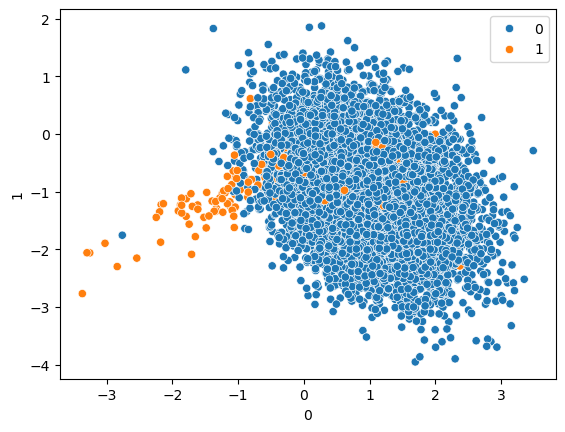

In [8]:
import pandas as pd
sns.scatterplot(x = pd.DataFrame(x)[0],y = pd.DataFrame(x)[1],hue = y)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state =42)

In [12]:
# hyper parameter tunning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
hyperparams = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial'],
    'max_iter': [100, 200, 300],
    'class_weight': [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
}

# Grid Search CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator=model,param_grid=hyperparams,scoring = 'accuracy',cv = cv,n_jobs = -1,)

In [14]:
grid.fit(x_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1.0, 10.0, 100.0],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'max_iter': [100, 200, 300],
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [16]:
grid.best_params_

{'C': 0.1,
 'class_weight': {0: 50, 1: 100},
 'max_iter': 100,
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [17]:
y_pred = grid.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.9896
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2491
           1       0.26      1.00      0.41         9

    accuracy                           0.99      2500
   macro avg       0.63      0.99      0.70      2500
weighted avg       1.00      0.99      0.99      2500

[[2465   26]
 [   0    9]]
